# K Nearest Neighbors Regression

Since KNN typically gives a single answer, which is the average or weighted average of the target values of the K nearest neighbors, we used a regression model for K Nearest Neighbors due to the continuous-multioutput

The K-Nearest Neighbors (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
sb.set()

In [2]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [3]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [4]:
customerDf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 

**The columns we will intake into our dataframe to read**

-------------------------------------------------
**4 Predictors**
1. Income
2. NumWebPurchases
3. NumCatalogPurchases
4. NumStorePurchases
--------------------------------------------------
**6 Responses**
1. MntWines
2. MntFruits
3. MntMeatProducts
4. MntFishProducts
5. MntSweetProducts
6. MntGoldProds
--------------------------------------------------
**Helper Columns**
1. Dt_Customer
2. Recency

In [5]:
KNN_df = customerDf.loc[:, ['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Recency']]

The helper columns are used to offset the difference in purchase that customers who are enrolled into the company earlier have.

In [6]:
KNN_df['Dt_Customer'] = pd.to_datetime(KNN_df['Dt_Customer'], format='%d-%m-%Y')
KNN_df["CurrentDate"] = datetime.datetime(2021, 1, 1)
KNN_df['numMonths'] = ((KNN_df['CurrentDate'] - KNN_df['Dt_Customer'])/np.timedelta64(1, 'M'))
KNN_df['Recency'] = KNN_df['Recency']/30 #assume 30days in a month

In [7]:
#average purchases over the months
for var in KNN_df.columns[4:10]:
    KNN_df[var] = KNN_df[var]/ (KNN_df["numMonths"] - KNN_df["Recency"])

KNN_df.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)

The helper columns is then dropped to clean up the amount of columns in the KNN dataFrame.

In [8]:
KNN_df

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,8,10,4,6.481022,0.898157,5.572659,1.755490,0.898157,0.898157
1,46344.0,1,1,2,0.136519,0.012411,0.074465,0.024822,0.012411,0.074465
2,71613.0,8,2,10,4.867850,0.559917,1.451213,1.268383,0.239964,0.479929
3,26646.0,2,0,4,0.134427,0.048882,0.244412,0.122206,0.036662,0.061103
4,58293.0,5,3,6,2.154818,0.535591,1.469760,0.572957,0.336301,0.186834
...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,9,3,4,7.956164,0.482532,2.042344,0.471310,1.324157,2.771753
2212,64014.0,8,2,5,5.280512,0.000000,0.390186,0.000000,0.000000,0.104049
2213,56981.0,2,3,13,11.323378,0.598593,2.706138,0.399062,0.149648,0.299296
2214,69245.0,6,5,10,5.157396,0.361500,2.578698,0.963999,0.361500,0.735049


We can see that the response columns are in decimal due to the averaging being done beforehand.

In [9]:
KNN_df.describe()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,4.085289,2.671029,5.800993,3.434783,0.298550,1.889912,0.425897,0.305814,0.494776
std,25173.076661,2.740951,2.926734,3.250785,3.774008,0.453732,2.540929,0.621686,0.466487,0.584823
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,2.000000,0.000000,3.000000,0.277336,0.020148,0.178176,0.031087,0.012748,0.103556
50%,51381.500000,4.000000,2.000000,5.000000,1.982401,0.091109,0.756134,0.135817,0.095060,0.274890
75%,68522.000000,6.000000,4.000000,8.000000,5.736124,0.369209,2.608185,0.559684,0.385290,0.639012
max,666666.000000,27.000000,28.000000,13.000000,17.179104,2.451923,20.074911,3.262791,3.321490,3.693851


We know from the EDA of our income variable that there are outliers that would impact the data. Hence, we would use the removeOut function to remove the outliers.

In [10]:
KNN_cleaned = removeOut(KNN_df)

In [11]:
KNN_cleaned.describe()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,43606.508816,3.475441,1.500000,4.844458,2.239563,0.117246,0.812299,0.168946,0.117938,0.283792
std,17135.627035,2.500919,1.836924,2.792620,3.055528,0.173064,1.146551,0.252275,0.175926,0.299924
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30793.750000,2.000000,0.000000,3.000000,0.159828,0.010916,0.127300,0.022530,0.010576,0.070626
50%,42399.000000,3.000000,1.000000,4.000000,0.707093,0.045866,0.310684,0.071862,0.047080,0.172012
75%,56051.250000,5.000000,2.000000,6.000000,3.131026,0.141793,1.000304,0.200083,0.146769,0.394917
max,90933.000000,11.000000,9.000000,13.000000,13.916021,0.892699,6.183509,1.302875,0.942197,1.427107


We can double check that the outliers have been removed as the max value of the **Income** column has changed from **666666** to **90933**.

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

predictors = KNN_cleaned.loc[:, ['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
responses = KNN_cleaned.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

predictors_train, predictors_test, responses_train, responses_test = train_test_split(predictors, responses, random_state = 42, train_size = 0.75)

The algorithm identifies the K nearest neighbors to the input data point based on their distances.

For regression, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point.

## Finding the optimal K Value for the model

We first iterate through a range of K values to find a trend in K with respect to the Goodness of Fit to the model.

In [13]:
for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(predictors_train, responses_train)

    predicted_responses_train = knn.predict(predictors_train)
    predicted_responses_test = knn.predict(predictors_test)
    explained_variance_train = knn.score(predictors_train, responses_train)
    explained_variance_test = knn.score(predictors_test, responses_test)
    mseTrain = mean_sq_err(responses_train, predicted_responses_train)
    mseTest = mean_sq_err(responses_test, predicted_responses_test)

    print("K Neighbours =\t", i)
    print("Goodness of Fit of Model\tTrain Dataset")
    print("Explained Variance (R^2) \t:", explained_variance_train)
    print("Mean Squared Error (MSE) \t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))
    print()
    print("Goodness of Fit of Model\tTest Dataset")
    print("Explained Variance (R^2) \t:", explained_variance_test)
    print("Mean Squared Error (MSE) \t:", mseTest)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTest))
    print()

K Neighbours =	 1
Goodness of Fit of Model	Train Dataset
Explained Variance (R^2) 	: 0.9992647299975191
Mean Squared Error (MSE) 	: 3.4404956972036944e-05
Root Mean Squared Error (RMSE) 	: 0.005865573882582756

Goodness of Fit of Model	Test Dataset
Explained Variance (R^2) 	: -0.10591888114945978
Mean Squared Error (MSE) 	: 1.3269938803083294
Root Mean Squared Error (RMSE) 	: 1.1519522040034167

K Neighbours =	 2
Goodness of Fit of Model	Train Dataset
Explained Variance (R^2) 	: 0.7113295238692067
Mean Squared Error (MSE) 	: 0.3013825927476328
Root Mean Squared Error (RMSE) 	: 0.5489832353976146

Goodness of Fit of Model	Test Dataset
Explained Variance (R^2) 	: 0.17353620280883317
Mean Squared Error (MSE) 	: 0.9547940934229211
Root Mean Squared Error (RMSE) 	: 0.9771356576355819

K Neighbours =	 3
Goodness of Fit of Model	Train Dataset
Explained Variance (R^2) 	: 0.5962908487958359
Mean Squared Error (MSE) 	: 0.4363055390449142
Root Mean Squared Error (RMSE) 	: 0.6605342830201277

Good

Since the Goodness of Fit for the Test Dataset is more important when deciding if it is able to predict accurately when introduced to New Values, we would take into account the **Explained Variance (R^2), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)** for the test Dataset.

| K Neighbors | Explained Variance (R^2) (Test) | Mean Squared Error (MSE) (Test) | Root Mean Squared Error (RMSE) (Test) |
|-------------|----------------------------------|----------------------------------|---------------------------------------|
| 1           | -0.106                           | 1.327                            | 1.152                                 |
| 2           | 0.174                            | 0.955                            | 0.977                                 |
| 3           | 0.220                            | 0.888                            | 0.942                                 |
| 4           | 0.259                            | 0.846                            | 0.920                                 |
| 5           | 0.278                            | 0.778                            | 0.882                                 |
| 6           | 0.287                            | 0.755                            | 0.869                                 |
| 7           | 0.305                            | 0.748                            | 0.865                                 |
| 8           | 0.316                            | 0.732                            | 0.855                                 |
| 9           | 0.321                            | 0.742                            | 0.861                                 |
| 10          | 0.331                            | 0.736                            | 0.858                                 |


From the table, we can see that there is an increasing trend as the number of K neighbors increase. However, there may be an inflexion point so we would need to go through a larger range to find out when the Explained Variance Starts dropping

In [14]:
maxEV = 0
optimal_k = 0

for i in range(1, 1000):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(predictors_train, responses_train)
    explained_variance_test = knn.score(predictors_test, responses_test)
    
    if explained_variance_test > maxEV:
        maxEV = explained_variance_test
        optimal_k = i
    elif explained_variance_test < maxEV and maxEV != 0:
        break;

print("The most optimal K in maximising Goodness of Fit:", optimal_k)

The most optimal K in maximising Goodness of Fit: 11


After sifting through the range from 1 to 999, we have found the the K that maximises the explained Variance is **11**.

Using the explained variance of 11, we input it into the model. It is then followed by predicting values for the test Dataset and finding the **Explained Variance (R^2), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)** respectively.

In [15]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(predictors_train, responses_train)

predicted_responses_train = knn.predict(predictors_train)
predicted_responses_test = knn.predict(predictors_test)
explained_variance_train = knn.score(predictors_train, responses_train)
explained_variance_test = knn.score(predictors_test, responses_test)
mseTrain = mean_sq_err(responses_train, predicted_responses_train)
mseTest = mean_sq_err(responses_test, predicted_responses_test)


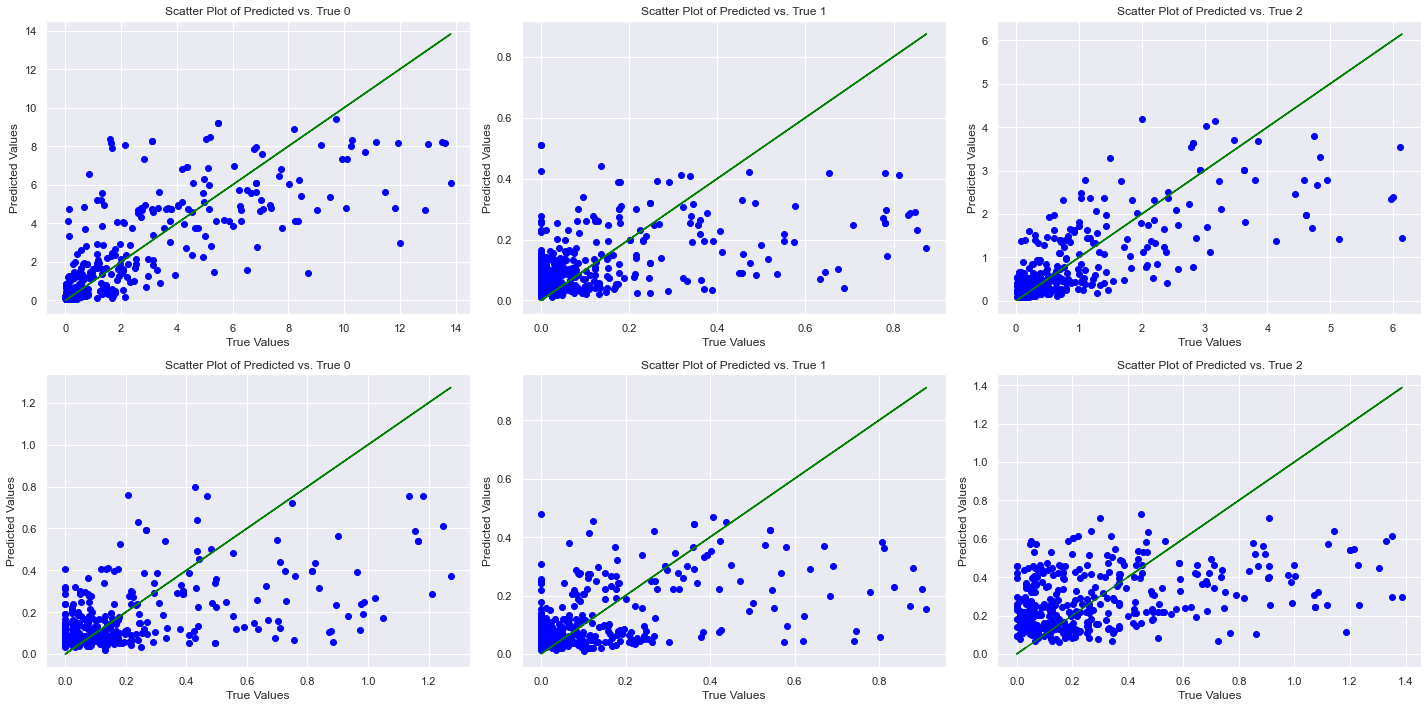

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
    
for i, col in enumerate(responses_test.columns):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    ax = axes[row, col]
    ax.scatter(responses_test.values[:, i], predicted_responses_test[:, i], color='blue')
    ax.plot(responses_test.values[:, i], responses_test.values[:, i], color='green')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title('Scatter Plot of Predicted vs. True {}'.format(col))
    
plt.tight_layout()
plt.show()

By plotting the graphs of the Predicted Values against the True Values for each of the responses, we can see how accurate the model is. The green line represents the line which **perfectly predicted** values will fall on.
<br>
<br>
Most of the values are clustered around the 0 to 0.2 region where there are significant amount of values lying on the line. 

To gain more clarity into how effective the model is in predicting the amount of each product purchased by the customers, we can check the **Explained Variance (R^2), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)**.

In [17]:
print("Goodness of Fit of Model\tTrain Dataset")
print("Explained Variance (R^2) \t:", explained_variance_train)
print("Mean Squared Error (MSE) \t:", mseTrain)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))
print()
print("Goodness of Fit of Model\tTest Dataset")
print("Explained Variance (R^2) \t:", explained_variance_test)
print("Mean Squared Error (MSE) \t:", mseTest)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTest))

Goodness of Fit of Model	Train Dataset
Explained Variance (R^2) 	: 0.42074479614949345
Mean Squared Error (MSE) 	: 0.6393292177521662
Root Mean Squared Error (RMSE) 	: 0.7995806511867118

Goodness of Fit of Model	Test Dataset
Explained Variance (R^2) 	: 0.3350401854752085
Mean Squared Error (MSE) 	: 0.7338586439943433
Root Mean Squared Error (RMSE) 	: 0.8566554990159949


From the Goodness of Fit of the Model we can see that
| K Neighbors | Explained Variance (R^2) (Test) | Mean Squared Error (MSE) (Test) | Root Mean Squared Error (RMSE) (Test) |
|-------------|----------------------------------|----------------------------------|---------------------------------------|
| 11           | 0.335                          | 0.734                          | 0.857                                |

The explained variance of 0.335 means that although the KNN Regression may not be the best fit model, it is still a great model that can predict with certain accuracy about the amount of products by type that a customer would purchase in the store. This is also supported by the relatively low Mean Squared Error.